## Building Models in scikit-learn

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
from sklearn.metrics import roc_curve

import pylab as pl
import pandas as pd
import numpy as np

%matplotlib inline

In [13]:
df = pd.read_csv("C:/Users/Ian/GitHub/project-inspector-gadget/data/data_with_features.csv")
df.head()

,property_group,020008,190019,199029,BR1000,BR1001,BR1010,BR1024,BR1041,BR1042,...,VT5030,VT6010,VT6020,VT6030,VT7010,VT7020,VT8010,VT8020,VT8030,status
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
feature_names = df.columns[1:730]
labels = df.columns[-1]

X = df[feature_names].values
y = df[labels].values
y.shape

(30000L,)

In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3, random_state = 0)

In [40]:
X_train.shape, y_train.shape

((21000L, 729L), (21000L,))

In [41]:
kf = cross_validation.KFold(len(df.index), n_folds=4)

In [42]:
ss = cross_validation.ShuffleSplit(len(df.index), n_iter=4, test_size=0.3, random_state=0)

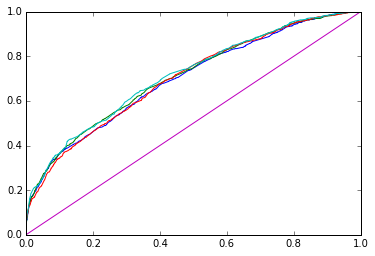

In [61]:
logisticRegression = LogisticRegression()
predictProb = []
    
for train,test in ss:
    train_set_features = X[train]
    test_set_features = X[test]
    train_set_labels = y[train]
    test_set_labels = y[test]
    logisticRegression.fit(train_set_features, train_set_labels)
    curve = roc_curve(y[test], logisticRegression.predict_proba(test_set_features)[:,1])
    pl.plot(curve[0], curve[1])

pl.plot(np.linspace(start=0, stop=1, num=100), np.linspace(start=0, stop=1, num=100))